In [443]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

In [444]:
from scripts.NHS_Data_Extraction.AandE_data import AandEData
# User input: Start and End Month-Year (Modify these values)
start_date = "February 2023"  # the desired start
end_date = "February 2025"      # the desired end

final_data = AandEData().download_data(start_date,end_date)

Accessing: https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2022-23/
Downloaded & Loaded: March 2023
Downloaded & Loaded: February 2023
Accessing: https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2023-24/
Downloaded & Loaded: March 2024
Downloaded & Loaded: February 2024
Downloaded & Loaded: January 2024
Downloaded & Loaded: December 2023
Downloaded & Loaded: November 2023
Downloaded & Loaded: October 2023
Downloaded & Loaded: September 2023
Downloaded & Loaded: August 2023
Downloaded & Loaded: July 2023
Downloaded & Loaded: June 2023
Downloaded & Loaded: May 2023
Downloaded & Loaded: April 2023
Accessing: https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2024-25/
Downloaded & Loaded: February 2025
Downloaded & Loaded: January 2025
Downloaded & 

In [445]:
# Displaying the structure of the merged DataFrame
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5002 entries, 204 to 3041
Data columns (total 30 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Period                                                      5002 non-null   object 
 1   Org Code                                                    5002 non-null   object 
 2   Parent Org                                                  5002 non-null   object 
 3   Org name                                                    5002 non-null   object 
 4   A&E attendances Type 1                                      5002 non-null   int64  
 5   A&E attendances Type 2                                      5002 non-null   int64  
 6   A&E attendances Other A&E Department                        5002 non-null   int64  
 7   A&E attendances Booked Appointments Type 1                  5002 non-null   int64  
 8   A

In [446]:
final_data.head()  # Displaying the first few rows of the merged dataset

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,...,Emergency admissions via A&E - Other A&E department,Other emergency admissions,Year,Month,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,a
204,MSitAE-FEBRUARY-2023,RYY,NHS ENGLAND SOUTH EAST,KENT COMMUNITY HEALTH NHS FOUNDATION TRUST,0,0,8143,0,0,0,...,0,0,2023,February,NaN,NaN,NaN,NaN,NaN,NaN
205,MSitAE-FEBRUARY-2023,Y02615,NHS ENGLAND MIDLANDS,SOUTH BIRMINGHAM GP WALK IN CENTRE,0,0,7477,0,0,0,...,0,0,2023,February,NaN,NaN,NaN,NaN,NaN,NaN
206,MSitAE-FEBRUARY-2023,8J094,NHS ENGLAND MIDLANDS,BADGER LTD,0,0,0,0,0,1822,...,0,0,2023,February,NaN,NaN,NaN,NaN,NaN,NaN
207,MSitAE-FEBRUARY-2023,AAH,NHS ENGLAND SOUTH WEST,TETBURY HOSPITAL TRUST LTD,0,0,272,0,0,0,...,0,0,2023,February,NaN,NaN,NaN,NaN,NaN,NaN
208,MSitAE-FEBRUARY-2023,AD913,NHS ENGLAND LONDON,BECKENHAM BEACON UCC,0,0,3052,0,0,211,...,0,0,2023,February,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
final_data.tail()  # Displaying the last few rows of the merged dataset

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,...,Emergency admissions via A&E - Other A&E department,Other emergency admissions,Year,Month,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,a
3037,MSitAE-FEBRUARY-2025,RYJ,NHS ENGLAND LONDON,IMPERIAL COLLEGE HEALTHCARE NHS TRUST,11067,3367,6469,0,0,431,...,0,1042,2025,February,NaN,NaN,NaN,NaN,NaN,NaN
3038,MSitAE-FEBRUARY-2025,NQT5F,NHS ENGLAND NORTH WEST,SKELMERSDALE WALK IN CENTRE,0,0,1730,0,0,0,...,0,0,2025,February,NaN,NaN,NaN,NaN,NaN,NaN
3039,MSitAE-FEBRUARY-2025,NQT5H,NHS ENGLAND SOUTH WEST,PAULTON MEMORIAL HOSPITAL,0,0,913,0,0,0,...,0,0,2025,February,NaN,NaN,NaN,NaN,NaN,NaN
3040,MSitAE-FEBRUARY-2025,RX1,NHS ENGLAND MIDLANDS,NOTTINGHAM UNIVERSITY HOSPITALS NHS TRUST,14519,1625,882,0,0,0,...,0,3931,2025,February,NaN,NaN,NaN,NaN,NaN,NaN
3041,MSitAE-FEBRUARY-2025,RH5,NHS ENGLAND SOUTH WEST,SOMERSET NHS FOUNDATION TRUST,10816,0,8601,0,0,0,...,0,1604,2025,February,NaN,NaN,NaN,NaN,NaN,NaN


In [448]:
print(final_data.isnull().sum())

Period                                                           0
Org Code                                                         0
Parent Org                                                       0
Org name                                                         0
A&E attendances Type 1                                           0
A&E attendances Type 2                                           0
A&E attendances Other A&E Department                             0
A&E attendances Booked Appointments Type 1                       0
A&E attendances Booked Appointments Type 2                       0
A&E attendances Booked Appointments Other Department             0
Attendances over 4hrs Type 1                                     0
Attendances over 4hrs Type 2                                     0
Attendances over 4hrs Other Department                           0
Attendances over 4hrs Booked Appointments Type 1                 0
Attendances over 4hrs Booked Appointments Type 2              

In [449]:
print("\nSummary Statistics:")
print(final_data.describe())


Summary Statistics:
       A&E attendances Type 1  A&E attendances Type 2  \
count             5002.000000             5002.000000   
mean              6735.633747              227.559376   
std               6720.495993              692.559609   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%               6864.000000                0.000000   
75%              11143.750000                0.000000   
max              35503.000000             6577.000000   

       A&E attendances Other A&E Department  \
count                           5002.000000   
mean                            3729.071172   
std                             3721.421461   
min                                0.000000   
25%                              423.000000   
50%                             2651.000000   
75%                             5842.500000   
max                            19240.000000   

       A&E attendances Booked Appointment

In [450]:
categorical_columns = ['Org Code', 'Parent Org', 'Org name']
for col in categorical_columns:
    final_data[col] = final_data[col].astype('category')


In [451]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5002 entries, 204 to 3041
Data columns (total 30 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Period                                                      5002 non-null   object  
 1   Org Code                                                    5002 non-null   category
 2   Parent Org                                                  5002 non-null   category
 3   Org name                                                    5002 non-null   category
 4   A&E attendances Type 1                                      5002 non-null   int64   
 5   A&E attendances Type 2                                      5002 non-null   int64   
 6   A&E attendances Other A&E Department                        5002 non-null   int64   
 7   A&E attendances Booked Appointments Type 1                  5002 non-null   int64

In [452]:
# Drop the columns that are completely empty
data = final_data.drop(columns=["Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25", "Unnamed: 26", "a"])

# Verify that the columns are removed
print("Remaining columns after dropping unnecessary ones:")
print(data.columns)


Remaining columns after dropping unnecessary ones:
Index(['Period', 'Org Code', 'Parent Org', 'Org name',
       'A&E attendances Type 1', 'A&E attendances Type 2',
       'A&E attendances Other A&E Department',
       'A&E attendances Booked Appointments Type 1',
       'A&E attendances Booked Appointments Type 2',
       'A&E attendances Booked Appointments Other Department',
       'Attendances over 4hrs Type 1', 'Attendances over 4hrs Type 2',
       'Attendances over 4hrs Other Department',
       'Attendances over 4hrs Booked Appointments Type 1',
       'Attendances over 4hrs Booked Appointments Type 2',
       'Attendances over 4hrs Booked Appointments Other Department',
       'Patients who have waited 4-12 hs from DTA to admission',
       'Patients who have waited 12+ hrs from DTA to admission',
       'Emergency admissions via A&E - Type 1',
       'Emergency admissions via A&E - Type 2',
       'Emergency admissions via A&E - Other A&E department',
       'Other emergency 

In [453]:
# Checking for missing values after dropping unnecessary columns
missing_values_after_cleanup = data.isnull().sum()
print("Missing values in dataset after initial cleanup:")
print(missing_values_after_cleanup[missing_values_after_cleanup > 0])


Missing values in dataset after initial cleanup:
Series([], dtype: int64)


In [454]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    # Drop duplicate rows
    data.drop_duplicates(inplace=True)
    print("Duplicate rows removed!")

Number of duplicate rows: 0


In [455]:
# Summary statistics of numerical columns
print(data.describe())


       A&E attendances Type 1  A&E attendances Type 2  \
count             5002.000000             5002.000000   
mean              6735.633747              227.559376   
std               6720.495993              692.559609   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%               6864.000000                0.000000   
75%              11143.750000                0.000000   
max              35503.000000             6577.000000   

       A&E attendances Other A&E Department  \
count                           5002.000000   
mean                            3729.071172   
std                             3721.421461   
min                                0.000000   
25%                              423.000000   
50%                             2651.000000   
75%                             5842.500000   
max                            19240.000000   

       A&E attendances Booked Appointments Type 1  \
count    

## Exploratory Data Analysis

In [456]:
# Convert 'Period' to datetime format (Month-Year format)
data["Period"] = pd.to_datetime(data["Month"] + " " + data["Year"].astype(str), format="%B %Y")

# Convert to Year-Month format (YYYY-MM) for analysis
data["Period"] = data["Period"].dt.strftime("%Y-%m")

# Verify the conversion
print("Converted 'Period' column data type:")
print(data.dtypes["Period"])

# Display unique periods to confirm formatting
print("\nUnique periods in dataset:")
print(data["Period"].unique())

Converted 'Period' column data type:
object

Unique periods in dataset:
['2023-02' '2023-03' '2023-04' '2023-05' '2023-06' '2023-07' '2023-08'
 '2023-09' '2023-10' '2023-11' '2023-12' '2024-01' '2024-02' '2024-03'
 '2024-04' '2024-05' '2024-06' '2024-07' '2024-08' '2024-09' '2024-10'
 '2024-11' '2024-12' '2025-01' '2025-02']


### A&E Attendance Trends Over Time

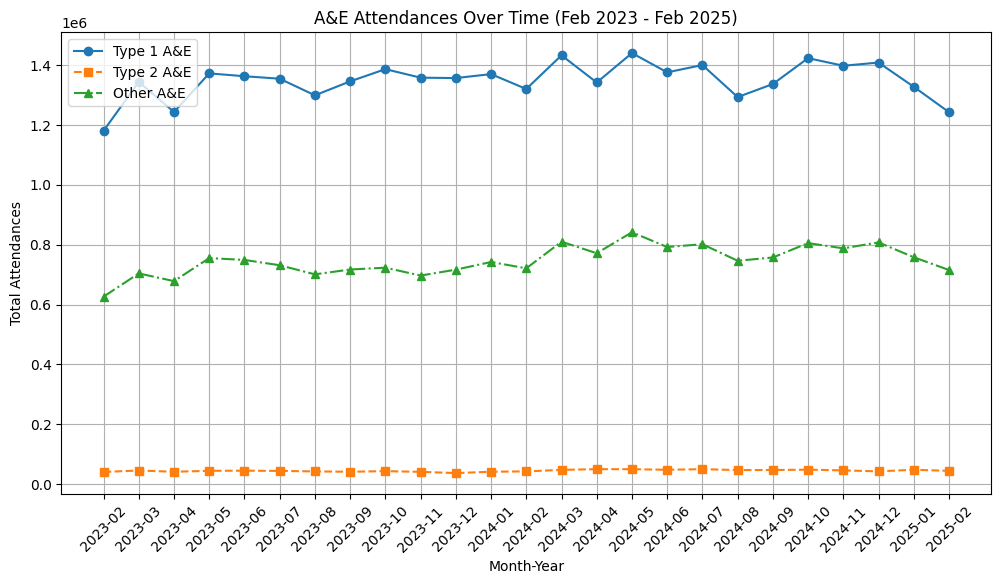

In [457]:
# Aggregating total A&E attendances per period
monthly_trends = data.groupby("Period")[["A&E attendances Type 1", "A&E attendances Type 2", "A&E attendances Other A&E Department"]].sum()

# Plotting the trends
plt.figure(figsize=(12,6))
plt.plot(monthly_trends.index, monthly_trends["A&E attendances Type 1"], marker='o', label="Type 1 A&E", linestyle="-")
plt.plot(monthly_trends.index, monthly_trends["A&E attendances Type 2"], marker='s', label="Type 2 A&E", linestyle="--")
plt.plot(monthly_trends.index, monthly_trends["A&E attendances Other A&E Department"], marker='^', label="Other A&E", linestyle="-.")
    
plt.title("A&E Attendances Over Time (Feb 2023 - Feb 2025)")
plt.xlabel("Month-Year")
plt.ylabel("Total Attendances")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Identifying Hospitals with the Highest A&E Attendances

C:\Users\adhir\AppData\Local\Temp\ipykernel_45560\3654350375.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_hospitals = data.groupby("Org name")[["A&E attendances Type 1"]].sum()


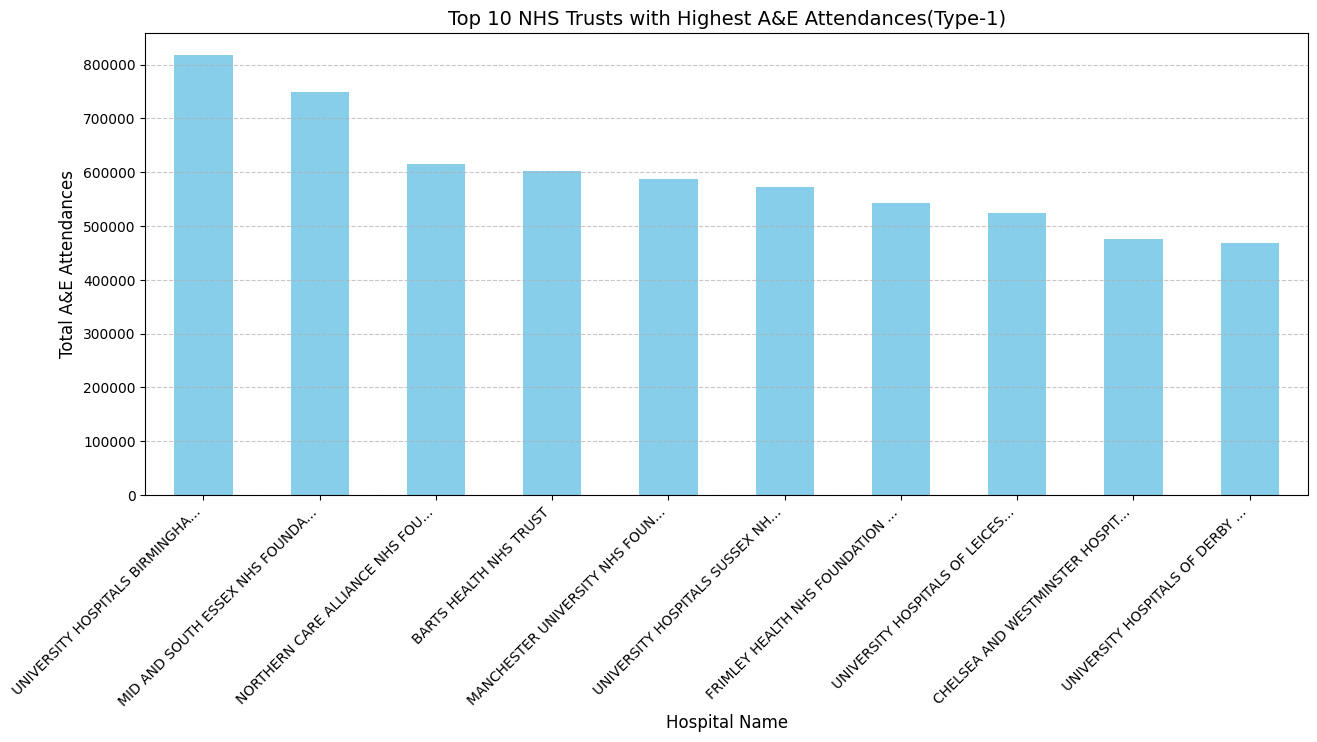

In [458]:
# Grouping by hospital and then sum A&E attendances
top_hospitals = data.groupby("Org name")[["A&E attendances Type 1"]].sum()

# Getting the top 10 hospitals with the highest A&E type 1 attendances
'''A&E Attendances Type 1" refers to patients visiting a consultant-led, 
    24-hour emergency department with full resuscitation facilities 
    for severe, life-threatening conditions.'''

top_hospitals = top_hospitals.sort_values(by="A&E attendances Type 1", ascending=False).head(10)
leng = 30
top_hospitals.index = [name[:leng] + "..." if len(name) > leng else name for name in top_hospitals.index]

fig, ax = plt.subplots(figsize=(15, 6))

# Plotting using Matplotlib to maintain figsize control
top_hospitals.plot(kind="bar", color="skyblue", legend=False, ax=ax)

# Adding labels and title
ax.set_title("Top 10 NHS Trusts with Highest A&E Attendances(Type-1)", fontsize=14)
ax.set_xlabel("Hospital Name", fontsize=12)
ax.set_ylabel("Total A&E Attendances", fontsize=12)

# Formatting x-axis labels
plt.xticks(rotation=45, ha="right")

# Adding grid lines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


### **Observations from the Plot**
From the **Top 10 NHS Trusts with Highest A&E Attendances (Type 1)** plot above, we can infer the following:

A) **Key Hospitals Handling the Most A&E Patients**  
- **University Hospitals Birmingham NHS Foundation Trust** has the **highest** A&E attendances.
- **Mid and South Essex NHS Foundation Trust** and **Northern Care Alliance NHS Foundation Trust** also have **very high** emergency patient volumes.

B) **Major NHS Trusts Dominate A&E Attendances**  
- Larger NHS Trusts in **Birmingham, Essex, and Manchester** have **higher patient loads**.
- This insight suggests that **major hospitals** generally handle the **majority of emergency cases**.

C) **Regional vs. Urban NHS Trusts**  
- Urban hospitals like **Barts Health NHS Trust (London)** and **Chelsea and Westminster Hospital NHS Foundation Trust** have **high A&E loads**.

D) **Capacity & Resource Planning Implications**  
- These hospitals may need **more resources**, **staff**, or **facilities expansion**.
- **Further analysis** can be checked so that we can understand whether **high attendances lead to longer wait times or overcrowding.**

### Identifying NHS Trusts with the Worst A&E Waiting Times (>4 Hours)

C:\Users\adhir\AppData\Local\Temp\ipykernel_45560\3838705654.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_waiting_hospitals = data.groupby("Org name")[["Attendances over 4hrs Type 1"]].sum()


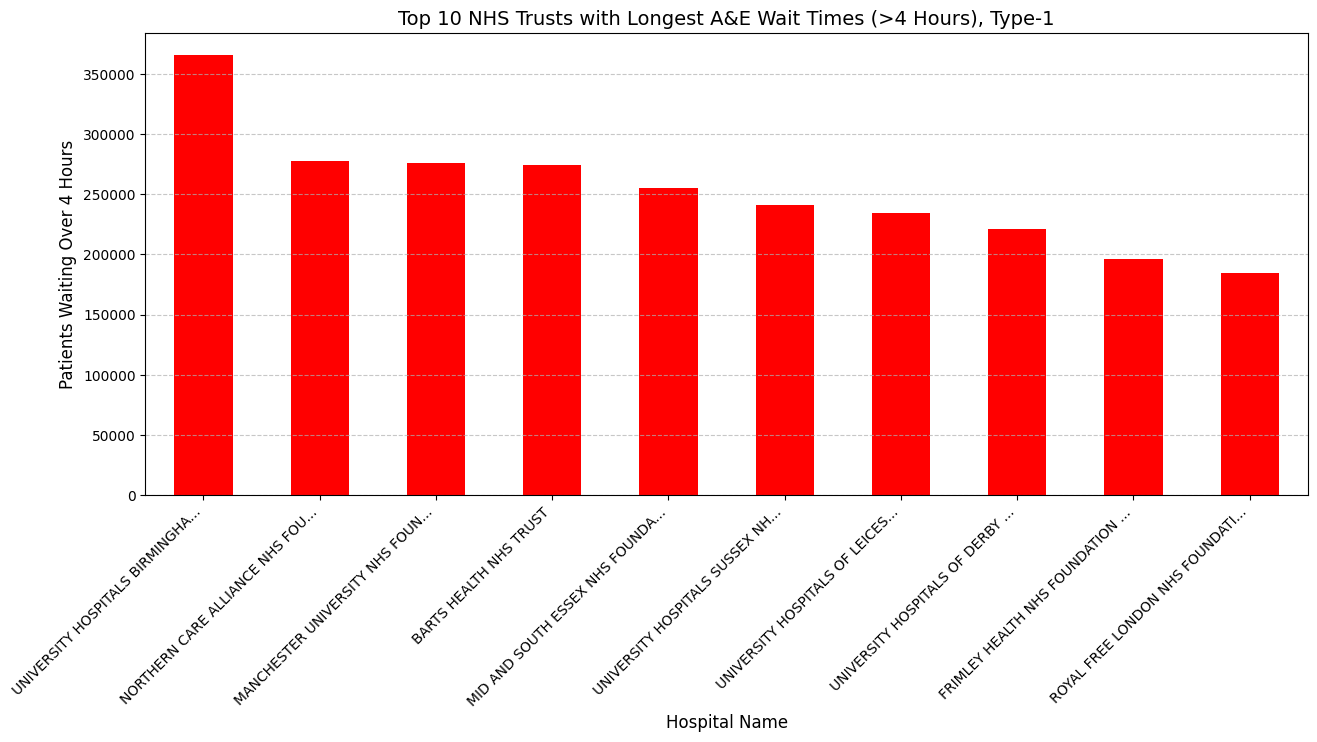

In [459]:
# Grouping by hospital and summing patients who waited over 4 hours in Type 1 A&E
top_waiting_hospitals = data.groupby("Org name")[["Attendances over 4hrs Type 1"]].sum()

# Getting the top 10 hospitals with the worst waiting times
''' Attendances over 4hrs Type 1" refers to patients who spent more than 4 hours 
    in a consultant-led, 24-hour emergency department before being admitted, 
    transferred, or discharged. '''

top_waiting_hospitals = top_waiting_hospitals.sort_values(by="Attendances over 4hrs Type 1", ascending=False).head(10)

# Shortening long hospital names for readability
top_waiting_hospitals.index = [name[:30] + "..." if len(name) > 30 else name for name in top_waiting_hospitals.index]

# Creating a Matplotlib figure with correct figsize
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting using Matplotlib to maintain figsize control
top_waiting_hospitals.plot(kind="bar", color="red", legend=False, ax=ax)

# Adding labels and title
ax.set_title("Top 10 NHS Trusts with Longest A&E Wait Times (>4 Hours), Type-1", fontsize=14)
ax.set_xlabel("Hospital Name", fontsize=12)
ax.set_ylabel("Patients Waiting Over 4 Hours", fontsize=12)

# Formatting x-axis labels
plt.xticks(rotation=45, ha="right")

# Adding grid lines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Observations from the Chart

From the **A&E waiting time chart** above, we can infer the following about the **Top 10 NHS Trusts with the Longest A&E Wait Times (>4 Hours) (Type 1)**:

A) **Hospitals with the Most Patients Waiting Over 4 Hours**
- **University Hospitals Birmingham NHS Foundation Trust** has the **worst A&E wait times**, with over **350,000 patients** waiting **more than 4 hours**.
- **Northern Care Alliance NHS Foundation Trust**, **Manchester University NHS Foundation Trust**, and **Barts Health NHS Trust** also have **very high numbers of patients waiting for more than 4 hours**.

B) **Correlation Between High Attendance and Long Waits?**
- **Hospitals with the most A&E attendances** (previous case) also appear on this **worst wait times** plot.
- This suggests that **high patient loads might contribute to longer waiting times**, possibly maybe for **resource constraints**.

C) **Systemic Delays in Major NHS Trusts**
- Many of the **largest NHS Trusts** (e.g., Birmingham, Manchester, Essex, Sussex, London) appear in both **highest attendances** and **longest waiting times**.
- This gives an idea about **systemic challenges in handling patient flow** in **high-demand hospitals**.

D) **Regional vs. Urban Differences**
- Urban hospitals like **Barts Health NHS Trust (London)** and **Royal Free London NHS Foundation Trust** experience **worse waiting time issues**.
- This raises concerns about **staffing levels, bed availability, and emergency response efficiency** in Urban cities, like London, Manchester etc.

E) **Capacity & NHS Resource Planning**
- NHS leadership might need to **increase staffing, improve bed management, or expand facilities** in hospitals with **persistent long wait times**.
- With continued analysis, we can investigate if **some hospitals can handle patient flow more efficiently than others**.

### Comparing Emergency Admissions from A&E

C:\Users\adhir\AppData\Local\Temp\ipykernel_45560\2801447380.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_admission_hospitals = data.groupby("Org name")[["Emergency admissions via A&E - Type 1"]].sum()


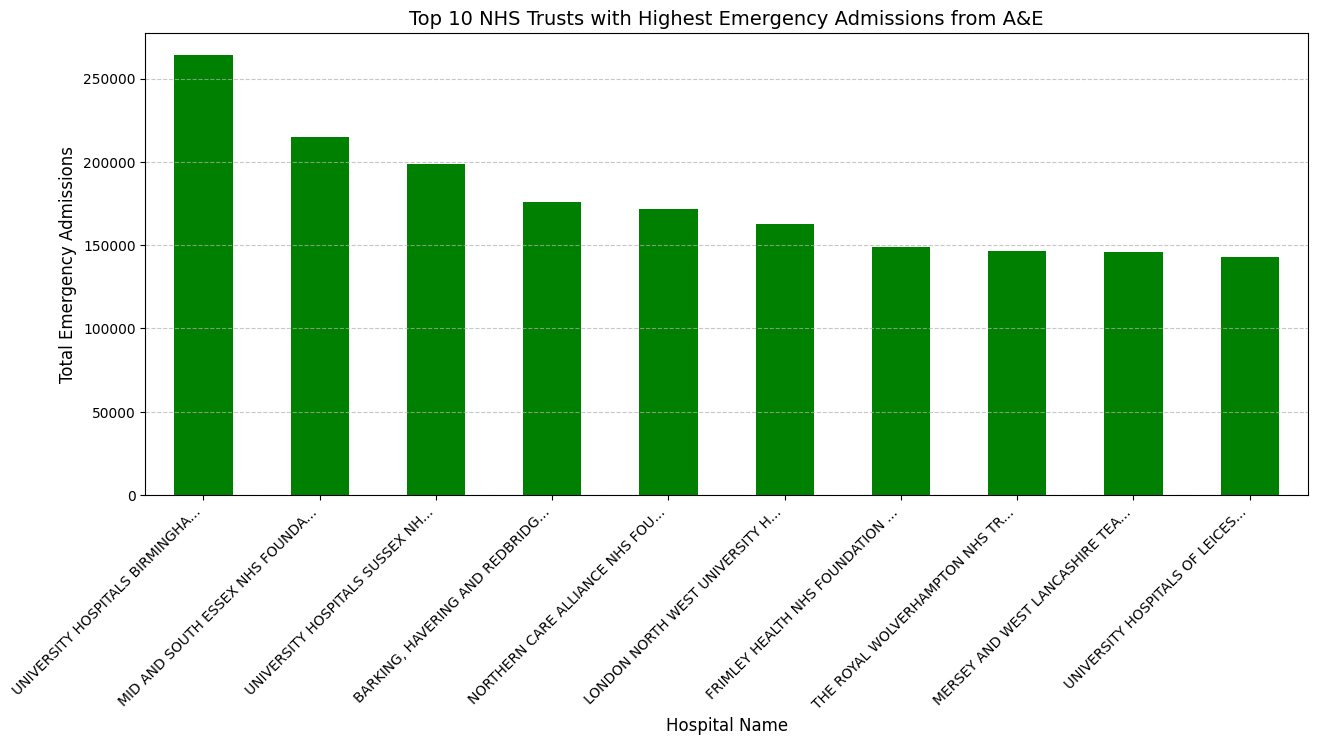

In [460]:
import matplotlib.pyplot as plt

# Group by hospital and sum emergency admissions via A&E Type 1
top_admission_hospitals = data.groupby("Org name")[["Emergency admissions via A&E - Type 1"]].sum()

# Getting the top 10 hospitals with the highest emergency admissions
''' "Emergency admissions via A&E - Type 1" refers to patients who were admitted 
    to the hospital after attending a consultant-led, 24-hour emergency department. '''

top_admission_hospitals = top_admission_hospitals.sort_values(by="Emergency admissions via A&E - Type 1", ascending=False).head(10)

# Shortening long hospital names for readability
top_admission_hospitals.index = [name[:30] + "..." if len(name) > 30 else name for name in top_admission_hospitals.index]

# Creating a Matplotlib figure with correct figsize
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting using Matplotlib to maintain figsize control
top_admission_hospitals.plot(kind="bar", color="green", legend=False, ax=ax)

# Adding labels and title
ax.set_title("Top 10 NHS Trusts with Highest Emergency Admissions from A&E", fontsize=14)
ax.set_xlabel("Hospital Name", fontsize=12)
ax.set_ylabel("Total Emergency Admissions", fontsize=12)

# Formatting x-axis labels
plt.xticks(rotation=45, ha="right")

# Adding grid lines
plt.grid(axis="y", linestyle="--", alpha=0.7)



# Show the plot
plt.show()


### **Observations from the Chart**
From the **Top 10 NHS Trusts with the Highest Emergency Admissions from A&E** plot above, we can infer:

A) **Hospitals with the Most Emergency Admissions**  
- **University Hospitals Birmingham NHS Foundation Trust** has the **highest number of emergency admissions**, exceeding **250,000 patients**.
- **Mid and South Essex NHS Foundation Trust**, **University Hospitals Sussex NHS Foundation Trust**, and **Barking, Havering, and Redbridge University Hospitals NHS Trust** also have **very high admissions in the emergency department**.

B) **Correlation Between High Attendance & High Admissions**  
- Some hospitals with **the most A&E attendances**  also have the **highest emergency admissions**.
- This suggests that **high patient volumes might directly lead to increased hospital admissions in the emergency department**.

C) **Systemic Strain on High-Demand NHS Trusts**  
- Large hospitals in **Birmingham, Essex, London, and Sussex** appear in the cases of **both long waiting times(>4 hours) and high emergency admissions**.
- This could mean **capacity issues, resource shortages, or delays in patient processing**.

D) **Urban vs. Regional Trends**  
- Major **urban NHS Trusts** (London, Essex, Birmingham) dominate in this list.
- This could refer towards **higher population density areas** facing **greater A&E demand and admission pressures**.

### Comparing NHS Regions Based on A&E Performance

C:\Users\adhir\AppData\Local\Temp\ipykernel_45560\2486777004.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_performance = data.groupby("Parent Org")[["A&E attendances Type 1", "Attendances over 4hrs Type 1"]].sum()


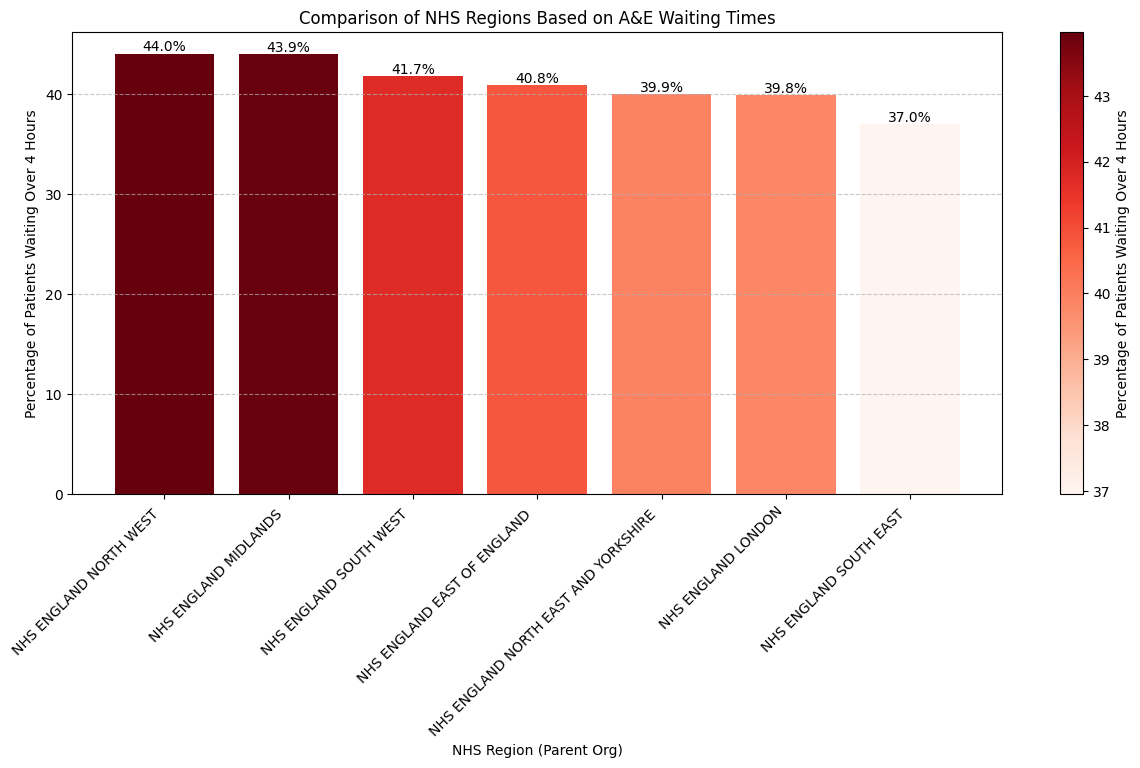

In [461]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Grouping data by NHS Parent Org and summing up total A&E attendances and waiting times
region_performance = data.groupby("Parent Org")[["A&E attendances Type 1", "Attendances over 4hrs Type 1"]].sum()

# Creating a new column for percentage of patients waiting over 4 hours
region_performance["% Waiting Over 4hrs"] = (region_performance["Attendances over 4hrs Type 1"] / 
                                             region_performance["A&E attendances Type 1"]) * 100

# Sorting regions based on percentage of patients waiting over 4 hours
region_performance = region_performance.sort_values(by="% Waiting Over 4hrs", ascending=False)

# Normalizing the data for color mapping
norm = Normalize(vmin=region_performance["% Waiting Over 4hrs"].min(), vmax=region_performance["% Waiting Over 4hrs"].max())
cmap = plt.get_cmap("Reds")

# Creating the bar plot
fig, ax = plt.subplots(figsize=(15, 6))

# Applying the color mapping to each bar based on the value of '% Waiting Over 4hrs'
bars = ax.bar(region_performance.index, region_performance["% Waiting Over 4hrs"], color=cmap(norm(region_performance["% Waiting Over 4hrs"])))

# Adding color bar for reference
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Percentage of Patients Waiting Over 4 Hours')

# Formatting plot
plt.title("Comparison of NHS Regions Based on A&E Waiting Times")
plt.xlabel("NHS Region (Parent Org)")
plt.ylabel("Percentage of Patients Waiting Over 4 Hours")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)


# Adding data labels (annotations) to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Formatting the label to show one decimal point
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Positioning the label in the center of the bar
                xytext=(0, 10),  # Adjusting the vertical offset of the label above the bar
                textcoords="offset points",
                ha='center', va='top',  # Centering the label
                fontsize=10, color='black')

# Showing the plot
plt.show()


### **Observations Based on the Plot**
From the plot titled **"Comparison of NHS Regions Based on A&E Waiting Times"**, we can observe the following:

A) **Regions with the Highest and Lowest Percentages of Patients Waiting Over 4 Hours:**
- **NHS England North West** and **NHS England Midlands** have the highest percentages of patients waiting over 4 hours, both approaching **44%**.
- The region with the **lowest** percentage of patients waiting over 4 hours is **NHS England South East**, with about **37%** of patients waiting over the threshold.

B) **Performance and Patient Flow Management:**
- **North West and Midlands** are the regions with the highest waiting times, indicating a potential **strain on healthcare resources**, such as staffing, infrastructure, or patient management in these areas.
- **South East**, with the lowest percentage, appears to be managing patient flow more effectively, although the **waiting times** are still significant.

C) **Urban vs. Rural Comparison:**
- Urban regions like **NHS England London** have a **relatively moderate waiting percentage** (~40%), suggesting that while these areas handle a higher volume of patients, they are not the worst performers.
- **Rural regions** might show lower figures, but the overall trend in A&E performance is **more dependent on the overall capacity** of the region rather than urban vs rural alone.

### Analyzing Percentage of A&E Attendees Who Were Admitted

C:\Users\adhir\AppData\Local\Temp\ipykernel_45560\2842247302.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_performance = data.groupby("Parent Org")[["A&E attendances Type 1", "Emergency admissions via A&E - Type 1"]].sum()


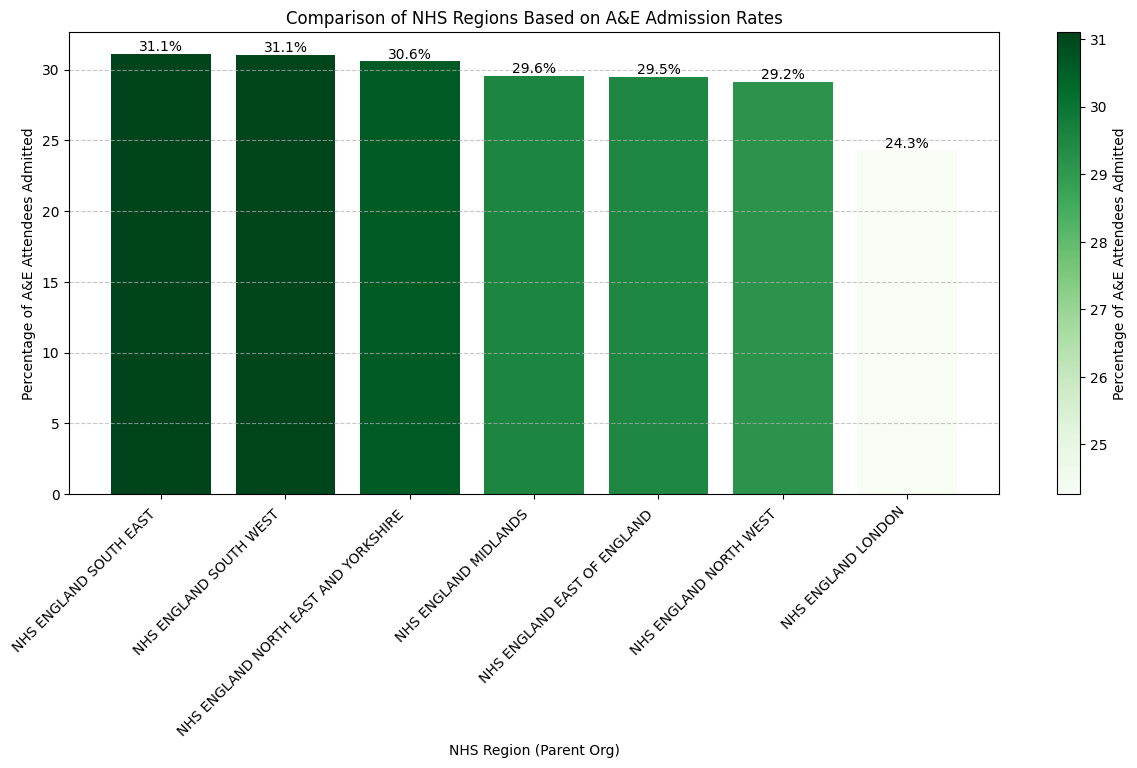

In [462]:
# Grouping data by NHS Parent Org and summing up total A&E attendances and emergency admissions
region_performance = data.groupby("Parent Org")[["A&E attendances Type 1", "Emergency admissions via A&E - Type 1"]].sum()

# Creating a new column for the admission rate (percentage of A&E attendees admitted)
region_performance["A&E Admission Rate"] = (region_performance["Emergency admissions via A&E - Type 1"] / 
                                              region_performance["A&E attendances Type 1"]) * 100

# Sorting regions based on the A&E admission rate
region_performance = region_performance.sort_values(by="A&E Admission Rate", ascending=False)

# Normalizing the data for color mapping
norm = Normalize(vmin=region_performance["A&E Admission Rate"].min(), vmax=region_performance["A&E Admission Rate"].max())
cmap = plt.get_cmap("Greens")

# Creating the bar plot
fig, ax = plt.subplots(figsize=(15, 6))

# Applying the color mapping to each bar based on the value of 'A&E Admission Rate'
bars = ax.bar(region_performance.index, region_performance["A&E Admission Rate"], color=cmap(norm(region_performance["A&E Admission Rate"])))

# Adding color bar for reference
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Percentage of A&E Attendees Admitted')

# Formatting plot
plt.title("Comparison of NHS Regions Based on A&E Admission Rates")
plt.xlabel("NHS Region (Parent Org)")
plt.ylabel("Percentage of A&E Attendees Admitted")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adding data labels (annotations) to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',  # Formatting the label to show one decimal point
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Positioning the label in the center of the bar
                xytext=(0, 10),  # Adjusting the vertical offset of the label above the bar
                textcoords="offset points",
                ha='center', va='top',  # Centering the label
                fontsize=10, color='black')

# Showing the plot
plt.show()


### **Key Observations from the Plot**:

1. **Highest Admission Rates**: 
   - **NHS England South East** and **NHS England South West** have the **highest admission rates** at **31.1%** each. This suggests that a significant portion of A&E attendees in these regions are being admitted to the hospital.
   
2. **Lowest Admission Rate**:
   - **NHS England London** has the **lowest admission rate** at **24.3%**. This could suggest that fewer A&E patients in this region are being admitted, possibly due to different healthcare management practices or resource allocation strategies.

3. **Moderate Admission Rates**:
   - The remaining regions (e.g., **NHS England North East and Yorkshire**, **NHS England Midlands**) have **similar admission rates**, varying around **29-30%**. These rates suggest that admission levels are somewhat consistent across these regions.

## Predictive Analytics

### Time-Series Forecasting

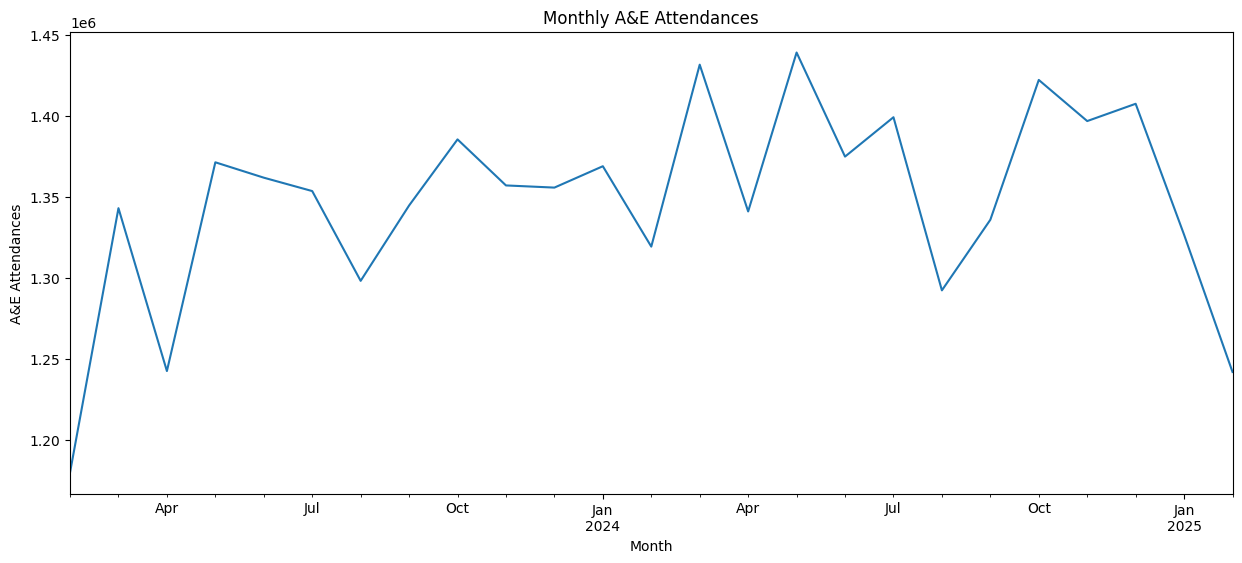

In [463]:
import pandas as pd

# Ensure the 'Period' column is in datetime format
data['Period'] = pd.to_datetime(data['Period'], errors='coerce')

# Aggregate data by month for time-series forecasting
monthly_data = data.groupby(data['Period'].dt.to_period('M'))['A&E attendances Type 1'].sum()

# Visualize the data to check for trends
monthly_data.plot(figsize=(15, 6), title="Monthly A&E Attendances")
plt.xlabel("Month")
plt.ylabel("A&E Attendances")
plt.show()

monthly_data = monthly_data.reset_index()


Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


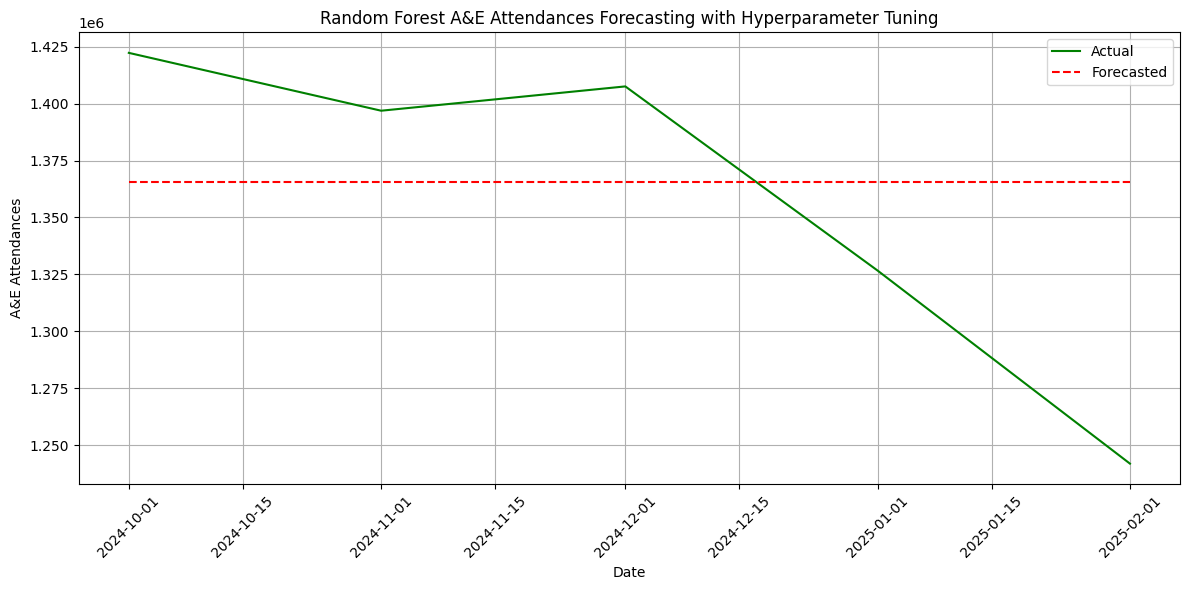

Mean Absolute Error (MAE): 58460.73500000001
Root Mean Squared Error (RMSE): 67473.19588789035
Mean Absolute Percentage Error (MAPE): 4.30%


In [465]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing data for Random Forest: Create lag features for time series
def create_lag_features(data, lags=12):
    lagged_data = data.copy()
    for i in range(1, lags+1):
        lagged_data[f'lag_{i}'] = lagged_data['y'].shift(i)
    lagged_data.dropna(inplace=True)  # Drop rows with NaN values (due to lagging)
    return lagged_data

# Ensuring correct column names
monthly_data.columns = ['ds', 'y']

# Creating lag features (using previous 12 months as lags)
lagged_data = create_lag_features(monthly_data, lags=12)

# Splitting into train and test data
train_data = lagged_data[:-5]  
test_data = lagged_data[-5:]

# Defining features (X) and target (y)
X_train = train_data.drop(columns=['ds', 'y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['ds', 'y'])
y_test = test_data['y']

# Defining Random Forest model
rf = RandomForestRegressor(random_state=42)

# Defining the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 500],  # Number of trees in the forest
    "max_depth": [10, 20, 30, None],  # Maximum depth of the tree
    "min_samples_split": [2, 5, 10, 20],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4, 8],  # Minimum samples required at a leaf node
    "criterion": ["squared_error", "absolute_error"]  # Loss function to measure quality of a split
}

# Performing Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Training Random Forest with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Forecasting on the test set
y_pred = best_rf.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(pd.DatetimeIndex(test_data['ds'].astype(str)), y_test, label='Actual', color='green')
plt.plot(pd.DatetimeIndex(test_data['ds'].astype(str)), y_pred, label='Forecasted', color='red', linestyle='--')
plt.title("Random Forest A&E Attendances Forecasting with Hyperparameter Tuning")
plt.xlabel("Date")
plt.ylabel("A&E Attendances")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Evaluating the forecast using MAE, RMSE, and MAPE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mae / np.mean(y_test) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

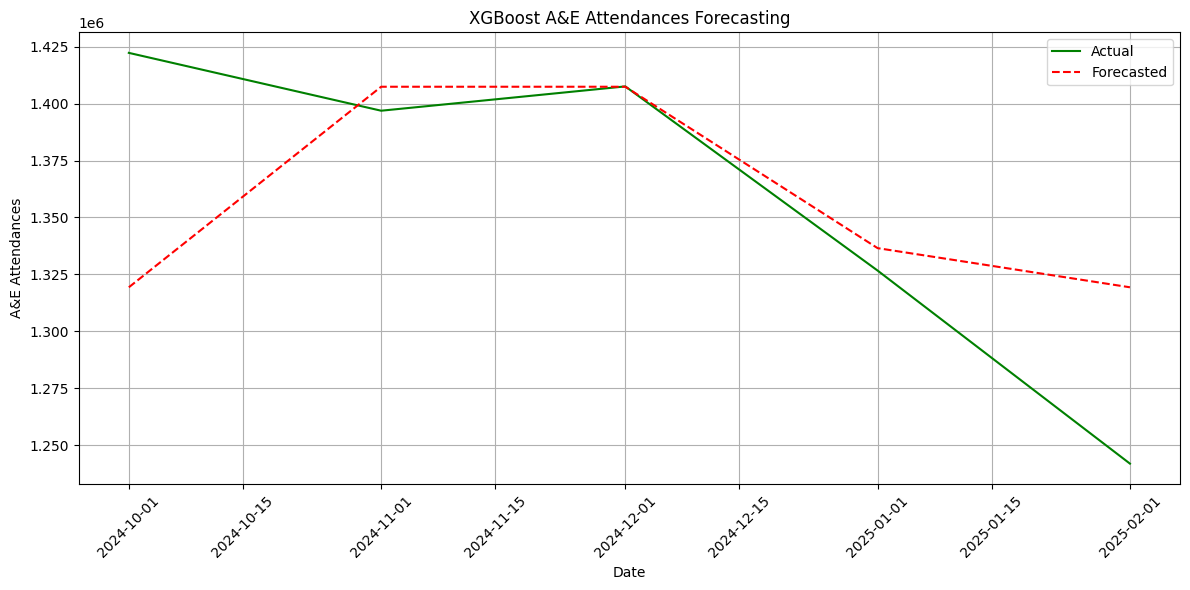

Mean Absolute Error (MAE): 40169.55078125
Root Mean Squared Error (RMSE): 57949.71834271501
Mean Absolute Percentage Error (MAPE): 2.96%


In [442]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for XGBoost: Create lag features for time series
def create_lag_features(data, lags=12):
    lagged_data = data.copy()
    for i in range(1, lags+1):
        lagged_data[f'lag_{i}'] = lagged_data['y'].shift(i)
    lagged_data.dropna(inplace=True)  # Drop rows with NaN values (due to lagging)
    return lagged_data

# Create lag features (using previous 12 months as lags)
# monthly_data = monthly_data.reset_index()  # Reset index if it's a period index
monthly_data.columns = ['ds', 'y']
lagged_data = create_lag_features(monthly_data, lags=12)

# Split into train and test data
train_data = lagged_data[:-5]  
test_data = lagged_data[-5:]

# Define features (X) and target (y)
X_train = train_data.drop(columns=['ds', 'y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['ds', 'y'])
y_test = test_data['y']

# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=10, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Forecast on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(pd.DatetimeIndex(test_data['ds'].astype(str)), y_test, label='Actual', color='green')
plt.plot(pd.DatetimeIndex(test_data['ds'].astype(str)), y_pred, label='Forecasted', color='red', linestyle='--')
plt.title("XGBoost A&E Attendances Forecasting")
plt.xlabel("Date")
plt.ylabel("A&E Attendances")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Evaluate the forecast using MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mae / np.mean(y_test)*100:.2f}%")
